In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
taxi = pd.read_csv(r"C:\Users\Владимир\Desktop\lesson_4\taxi_peru.csv",sep = ';')

In [9]:
print(f'df has {taxi.shape[0]} rows and a {taxi.shape[1]} columns')

df has 23111 rows and a 19 columns


In [ ]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']) / np.timedelta64(1, 'm')



In [ ]:
taxi_fast = taxi.query('start_type == "asap" or start_type == "reserved"')

In [ ]:
most_bad_driver = taxi_fast.query('start_type == "reserved" and wait_time > 0.0')\
        .groupby('driver_id',as_index = False).agg({'wait_time':'count'})\
        .sort_values(by = 'wait_time', ascending = False)

In [ ]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [ ]:
 month_distr = taxi.groupby('month',as_index = False).agg({'end_at':'count'}).rename(columns = {'end_at':'count_orders'})

In [ ]:
plt.figure(figsize = (10,6.5))
sns.countplot(x = 'weekday', data = taxi,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.despine()
plt.show()

In [ ]:
mau = taxi.groupby('month',as_index = False).agg({'user_id':lambda group:group.nunique()})

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x='month', y='user_id',data= mau,marker ='o' )
plt.xticks(range(1,13));

In [57]:
wau = taxi.query(' end_at > "2010-11-16" and end_at < "2010-11-23"').groupby('weekday',as_index = False).agg({'user_id': pd.Series.nunique}).

<Axes: xlabel='weekday', ylabel='user_id'>

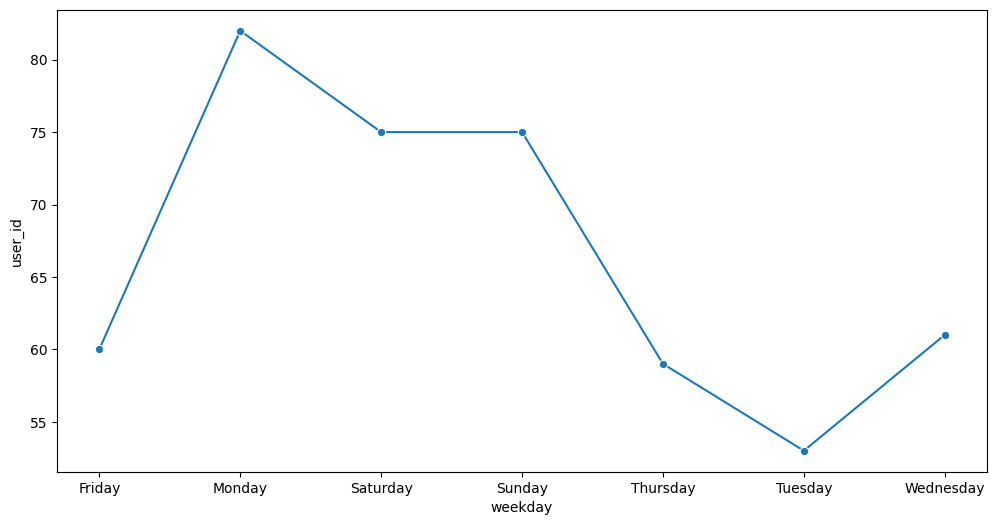

In [66]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'weekday',y = 'user_id',data = wau, marker = 'o')

In [63]:
wau

,weekday,user_id
0,Friday,60
1,Monday,82
2,Saturday,75
3,Sunday,75
4,Thursday,59
5,Tuesday,53
6,Wednesday,61


<Axes: xlabel='weekday', ylabel='user_id'>

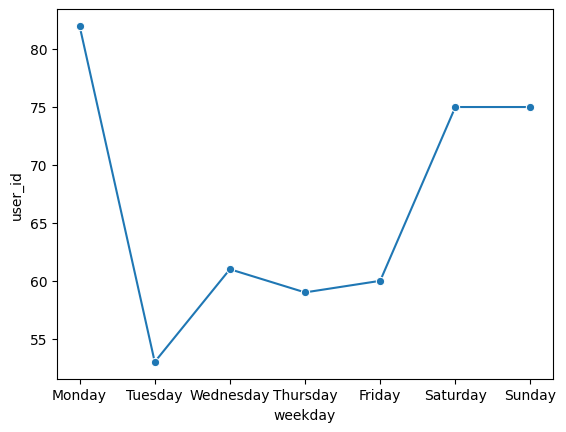

In [68]:
wau["weekday"] = pd.Categorical(
    wau["weekday"],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered=True
)

sns.lineplot(x="weekday", y="user_id", data=wau, marker="o")